In [1]:
#import all required libraries
import pandas as pd
import time
import cv2 as cv
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

## Applying SIFT

In [3]:
datadir = 'Image_Classification' 
sift = cv.SIFT_create()

sift_vectors = []
labels = []
class_labels = ['Cars', 'Ice cream cone', 'Cricket ball']

for label_index, class_label in enumerate(class_labels):
    for file in os.listdir(os.path.join(datadir, class_label)):
        if file.endswith('.jpg'):
            image = imread(os.path.join(datadir, class_label, file))
            resized_image = resize(image, (128, 64, 3))
            gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            
            kp, des = sift.detectAndCompute(gray, None)
            
            des = image_resized.flatten()
            sift_vectors.append(des)
            labels.append(label_index)
            
            
sift_vectors = np.array(sift_vectors)
labels = np.array(labels)

df = pd.DataFrame(sift_vectors)
df['labels'] = labels

In [27]:
# Separating the data into x and y sets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Spliting into training and testing sets(for HOG)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sift_vectors, labels, test_size = 0.2, random_state = 0)

# Standardize the data
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Training time: 0.472 seconds
Actual Values [0 2 0 1 0 0 2 1 2 0 0 1 1 0 2 1 1 0 2 1 1 2 2 2 0 1 0 1 0 2 2 2 2 1 2 0 0
 1 1 1 0 1 2 1 2 2 2 0 2 2 2 2 2 0 0 0 0 2 0 1 0 1 1 0 0 2 1 1 2 2 1 2 0 0
 2 2 1 2 1 1 0 1 2 0 2 0 2 2 2 1 2 2 0 1 2 0 1 2 2 2 0 0 2 0 2 1 2 2 0 0 1
 1 0 0 2 0 0 2 0 2 0 2 1 0 0 2 0 2 1 1 0 2 2 0 2 2 0 0 2 1 0 1 0 0 1 0 2 1
 0 2 1 2 0 2 1 1 0 0 0 1 2 2 2 0 1 1 1 1 2 0 1 1 1 2 0 1 0 2 1 0 0 0 0 2 0
 2 1 1 2 0 2 1 0]
Predicted Values [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy for training of  :  0.3763020833333333
Accuracy Test time in Logistic Regression :  0.35233160621761656
[[68  0  0]
 [55  0  0]
 [70  0  0]]


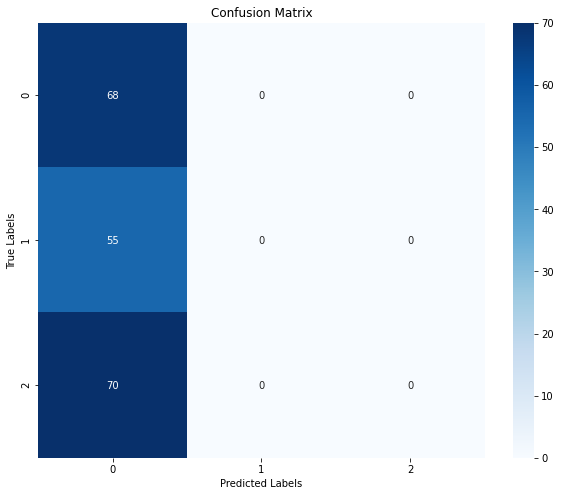

In [24]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()

start_time = time.time()    
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.3f} seconds".format(training_time))

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Actual Values', y_test)
print('Predicted Values', y_pred)

print('Accuracy for training of  : ', accuracy_score(y_train, y_train_pred))
print('Accuracy Test time in Logistic Regression : ', accuracy_score(y_test, y_pred) )

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [6]:
from sklearn.svm import SVC 

# Next we perform the step above of (data_Spliting and StandardScaler)

classifier = SVC(kernel = 'linear', random_state = 0)

start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Traning Accuracy is : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy is : ', accuracy_score(y_test, y_pred))

# Now we can also find the cofusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

time complexity :17.419 
Traning Accuracy is :  0.3763020833333333
Testing Accuracy is :  0.35233160621761656
[[68  0  0]
 [55  0  0]
 [70  0  0]]


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini')

start_time = time.time()
tree.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_train_pred = tree.predict(x_train)
y_pred = tree.predict(x_test)

print("Training State Accuracy : ", accuracy_score(y_train, y_train_pred))
print('Testing state Accuracy : ', accuracy_score(y_pred, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

time complexity :0.486 
Training State Accuracy :  0.3763020833333333
Testing state Accuracy :  0.35233160621761656
[[68  0  0]
 [55  0  0]
 [70  0  0]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 ,criterion="entropy", random_state=0)

start_time=time.time()
forest.fit(x_train , y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))
forest.score(x_train, y_train)

y_train_pred = forest.predict(x_train)
y_pred = forest.predict(x_test)

print("Accuracy Rate during Training : ",accuracy_score(y_train_pred, y_train))
print("Accuracy Rate during Testing : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

time complexity :2.545 
Accuracy Rate during Training :  0.3763020833333333
Accuracy Rate during Testing :  0.35233160621761656
[[68  0  0]
 [55  0  0]
 [70  0  0]]
